In [63]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

## Patrycja Wysocka, student number: 306022

In [2]:
red_wine = pd.read_csv('./wine_quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('./wine_quality/winequality-white.csv', sep=';')

# naming type of wine
red_wine.insert(0, 'wine colour', 'red')
white_wine.insert(0, 'wine colour', 'white')

# check column names
print(f"Red wine: \n \
    columns: {list(red_wine.columns)} \n \
    shape: {red_wine.shape}")
print(f"White wine: \n \
      columns: {list(white_wine.columns)} \n \
      shape: {white_wine.shape}")

# merging together
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

wine_df.rename(columns={'wine colour': 'wine_colour'}).to_csv('./wine.csv', index=False)


wine_df

Red wine: 
     columns: ['wine colour', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
     shape: (1599, 13)
White wine: 
       columns: ['wine colour', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 
       shape: (4898, 13)


,wine colour,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


a) investigating the distribution of alcohol variable

In [3]:
wine_df['alcohol'].nunique()

111

In [4]:
wine_df['alcohol'].describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

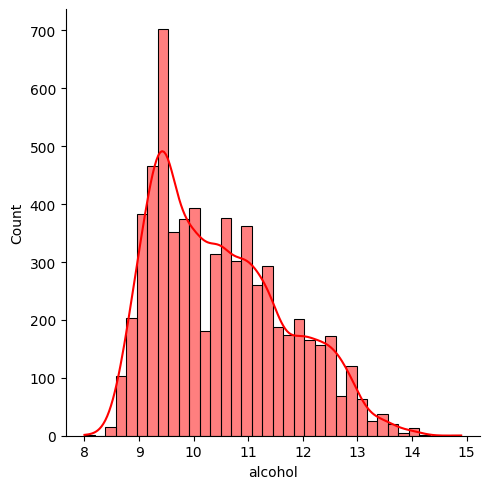

In [65]:
sns.displot(x='alcohol', data=wine_df, kde=True, color='red')

We can see that in this dataset there are mostly wines of around 9-10 alcohol percentage. Here bar plot could be also useful, to collect alcohol percentage in some buckets. However, I decided that displot is more intresting and contains more information.

b) comparing the distribution of alcohol variable between two types of wine i.e. red and white 

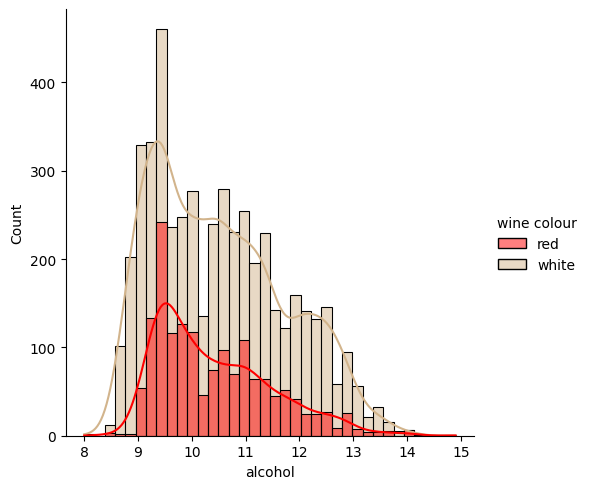

In [67]:
sns.displot(x='alcohol', hue='wine colour', data=wine_df, kde=True, palette=['red', 'tan'])


Distributions of both wine colours are quite similar, most of wines has around 9-10 alcohol percentage, but in case of white wine we have a small local extremum around 10.5 and 12.5 alcohol percentage, meanwhile in case of red wine density decreases starting from 10 alcohol percentage. Presenting the data on the same plot gives us precise insight to compare distribution of alcohol variable.

c) comparing the distribution of alcohol variable in each of possible quality group defined by response
variable

In [7]:
wine_df['quality'].nunique()

7

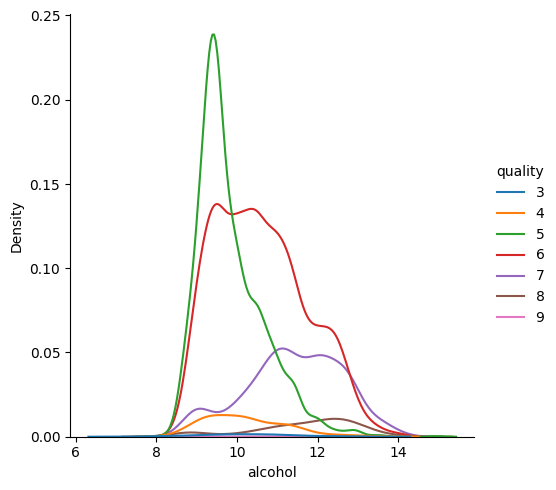

In [69]:
sns.displot(x='alcohol', hue='quality', data=wine_df, kind="kde", palette="tab10")

In [16]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9])

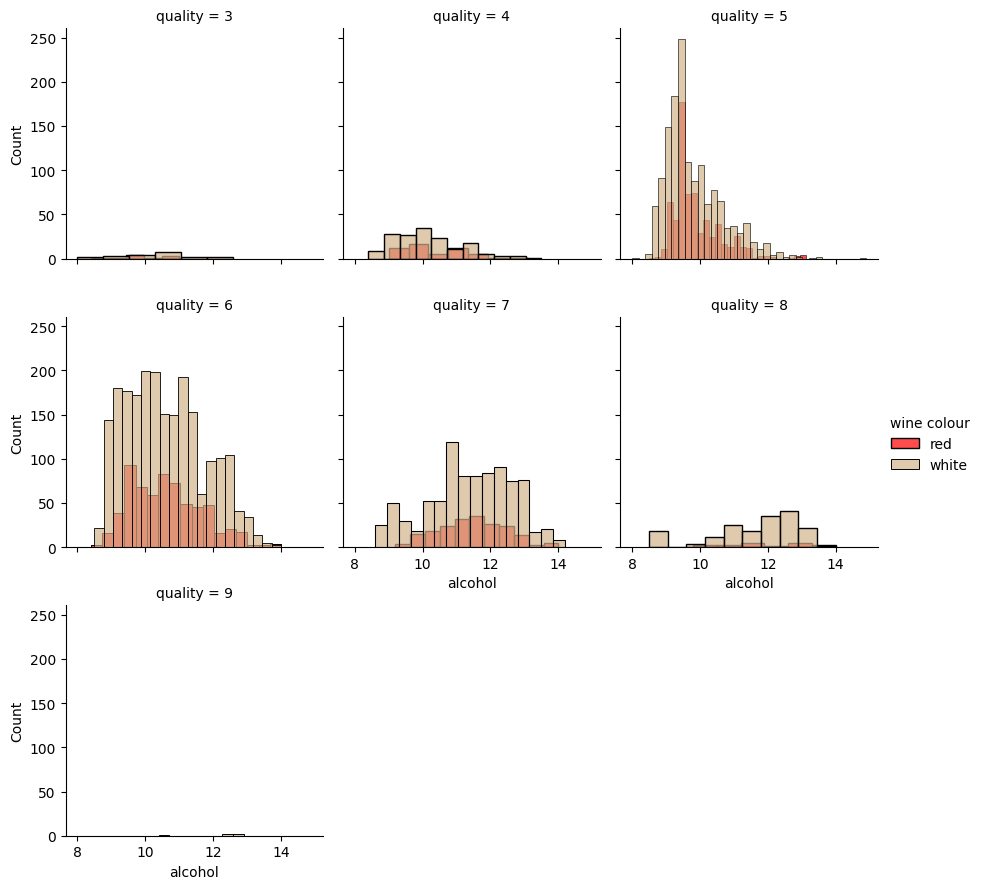

In [24]:
g = sns.FacetGrid(wine_df, col="quality", hue="wine colour", palette=['red', 'tan'], col_wrap=3)
g.map(sns.histplot, "alcohol", alpha=.7)
g.add_legend()


<Axes: xlabel='quality', ylabel='alcohol'>

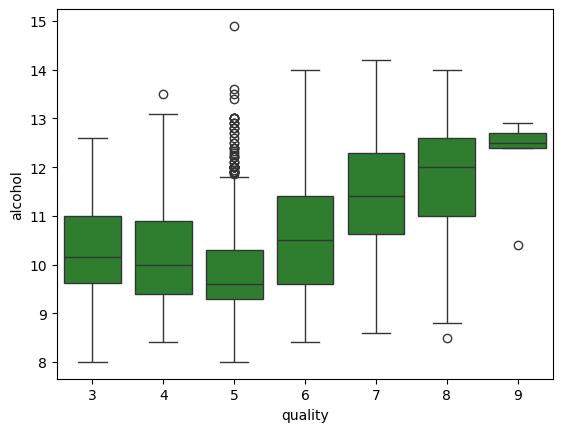

In [9]:
sns.boxplot(data=wine_df, x='quality', y='alcohol', color='forestgreen')

<Axes: xlabel='quality', ylabel='alcohol'>

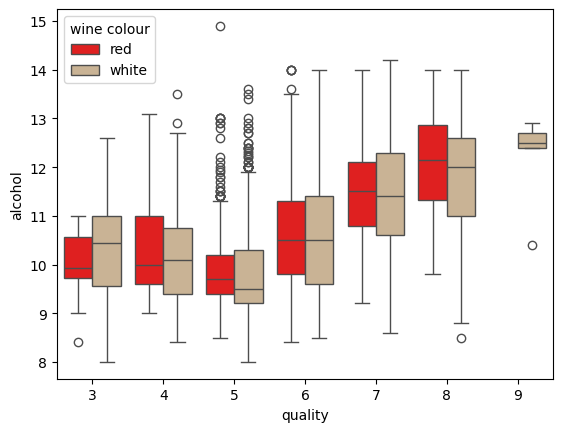

In [10]:
sns.boxplot(data=wine_df, x='quality', y='alcohol', hue='wine colour', palette=['red', 'tan'])

All above plots show, that the lowest variance is in case of class 5, however, there are many outliers. In contrary, classes 6 and 7 present the highest variance of alcohol percentage. 
I decided to use all of them, because in that case we conclude more. On Boxplots its is easier to compare variance among classes, and compare it also beetween wine colour, but displot give us insight into general distribution per class.

d) percentage of red and white wines within each quality group

<Axes: xlabel='quality', ylabel='percent'>

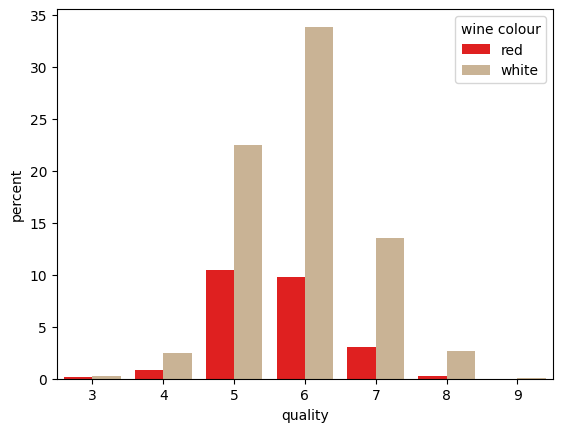

In [11]:
sns.countplot(data=wine_df, x='quality', hue='wine colour', palette=['red', 'tan'], stat="percent")

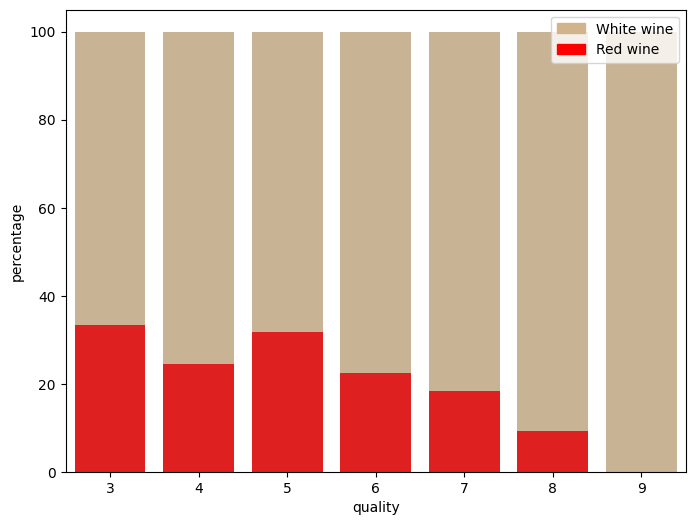

In [74]:
# import libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# set the figure size
plt.figure(figsize=(8, 6))

# from raw value to percentage
total = wine_df.groupby('quality')['wine colour'].count().reset_index()
red = wine_df[wine_df['wine colour'] == 'red'].groupby('quality')['wine colour'].count().reset_index()
red['percentage'] = [red_quality / total_quality * 100 for red_quality, total_quality in zip(red['wine colour'], total['wine colour'])]
total['percentage'] = [total_quality / total_quality * 100 for total_quality, total_quality in zip(total['wine colour'], total['wine colour'])]

# bar chart 1 -> top bars (white wine)
bar1 = sns.barplot(x="quality", y ='percentage', data=total, color='tan')

# bar chart 2 -> bottom bars (red wine)
bar2 = sns.barplot(x="quality", y='percentage', data=red, color='red')

# add legend
top_bar = mpatches.Patch(color='tan', label='White wine')
bottom_bar = mpatches.Patch(color='red', label='Red wine')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Generally in the dataset there are far more examples of white wine, so in all of the cases white wine has a majority in every group. Classes 3 and 5 contain the higest percentage of red wine among the others.
I decided to create two charts, in my opinion on the second one it is easier to see proportions between wine colours in every class. On the other hand, the first one present us exactly what percent of whole data is represented by every bucket.

e) investigating the relationship between variables describing acidity of the wines

In [45]:
columns = wine_df.columns.tolist()
columns.remove("volatile acidity")
len(columns)

12

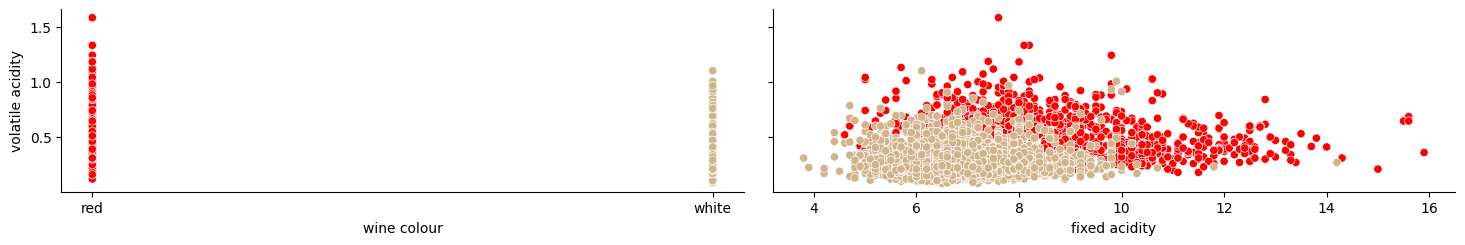

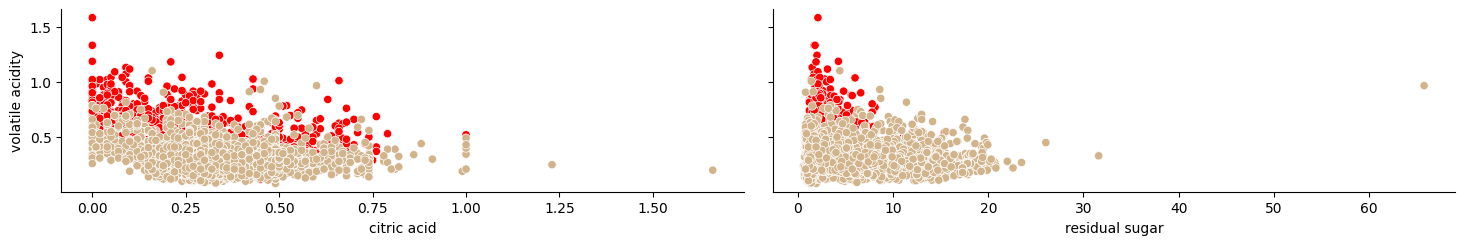

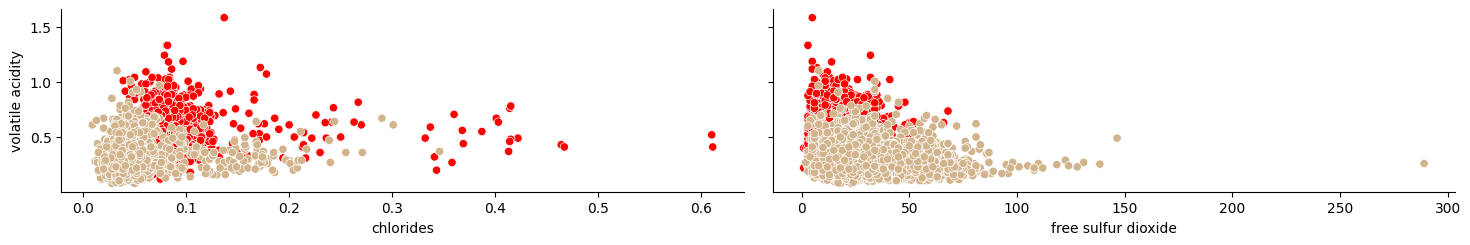

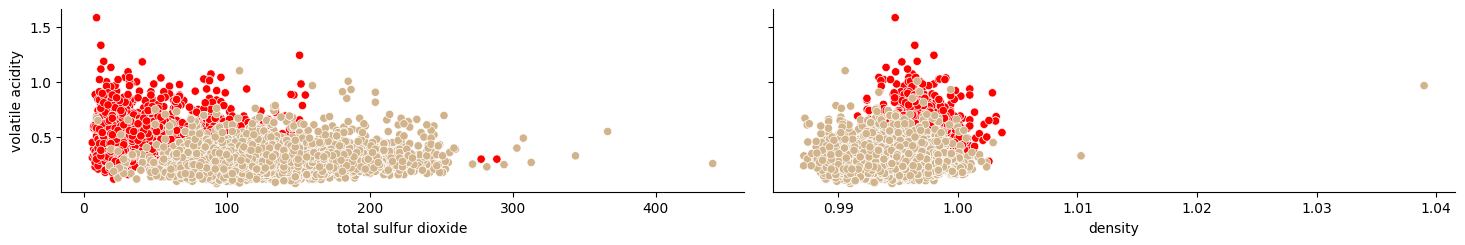

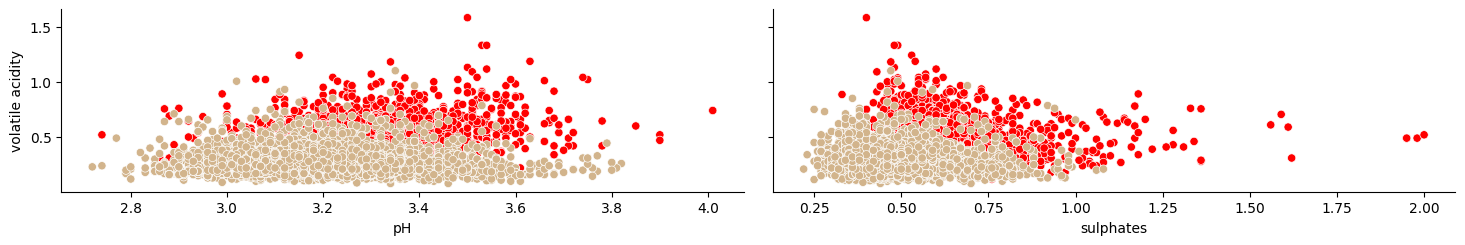

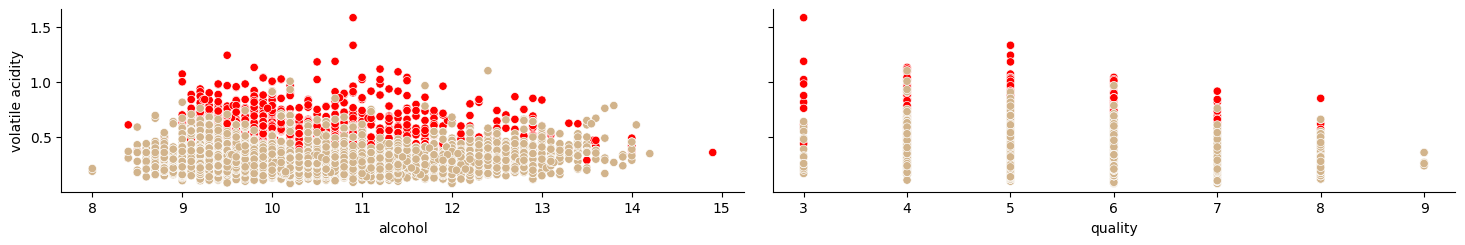

In [62]:
prev = 0
for x in range(13):
    if x % 2 == 0 and x > 0:
        g = sns.PairGrid(wine_df, y_vars=["volatile acidity"], x_vars=columns[prev:x], aspect=3, hue='wine colour', palette=['red', 'tan'])
        g.map(sns.scatterplot)
        prev = x


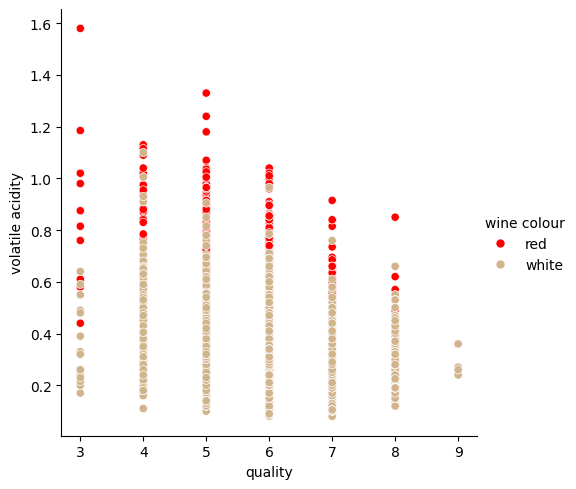

In [13]:
sns.relplot(data=wine_df, x="quality", y="volatile acidity", hue='wine colour', palette=['red', 'tan'])

We can see that red wines have higher acidity than white ones. Also depending on the class there are more and less acid wines - class 5 is the one with the higest acidity rate, and 9 the lowest, however it doesn't have too many samples so it is not very representative. It is worth to mention here, that simple splitting the chart between wine colours gave us intresting information.